In [1]:
import xarray as xr
import dask.array as da
from dask.distributed import Client, LocalCluster
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_cluster(workers = 4, memory_limit = 9, threads=1):
    mem = str(memory_limit) + "GB"
    cluster = LocalCluster(n_workers=workers, memory_limit=mem, threads_per_worker=threads)
    client = Client(cluster)
    print(client.dashboard_link)
    return client

In [5]:
def make_large_array(x, y, sed=1992):
    rng = da.random.RandomState(seed=sed)
    data = rng.random(size=(x, y), chunks=(1000, 1000))
    return data

In [6]:
def calculate_z_score(arr):
    mean = arr.mean()
    std = arr.std()
    z_score_array = (arr - mean)/std
    return z_score_array

In [5]:
# DEBUG CELL
c = make_cluster(1, 10)

large_array = make_large_array(20000, 20000)

z_array = calculate_z_score(large_array)
z_array.compute()
print("Z-score calculation complete.")
print(z_array)
c.shutdown()

http://127.0.0.1:8787/status
Z-score calculation complete.
dask.array<truediv, shape=(20000, 20000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>


In [6]:
%%timeit -n 1 -r 1
c = make_cluster(1, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()


http://127.0.0.1:8787/status
Number of Cores Utilized: 1
13.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%%timeit -n 1 -r 1
c = make_cluster(2, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()
c.shutdown()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45099 instead
  warnings.warn(


http://127.0.0.1:45099/status
Number of Cores Utilized: 2
11.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
c = make_cluster(3, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()
c.shutdown()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41317 instead
  warnings.warn(


http://127.0.0.1:41317/status
Number of Cores Utilized: 3
10.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%%timeit -n 1 -r 1
c = make_cluster(4, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()
c.shutdown()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45195 instead
  warnings.warn(


http://127.0.0.1:45195/status
Number of Cores Utilized: 4
10.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
%%timeit -n 1 -r 1
c = make_cluster(8, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()
c.shutdown()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37075 instead
  warnings.warn(


http://127.0.0.1:37075/status
Number of Cores Utilized: 8
13.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


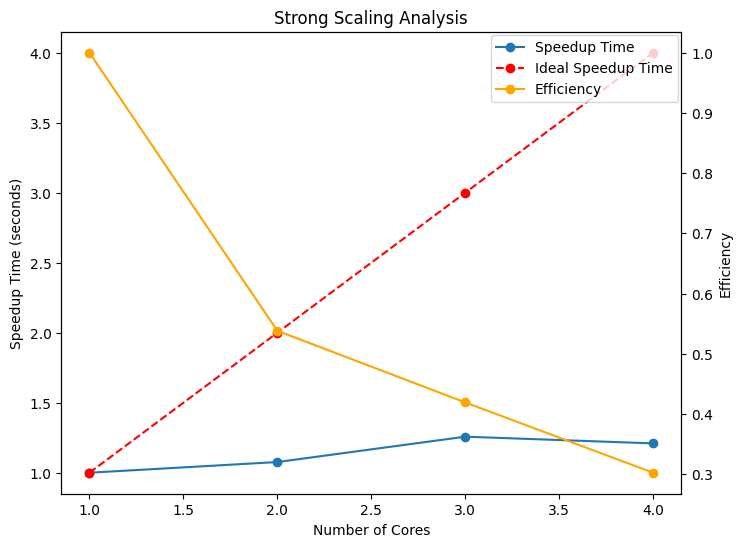

In [12]:
# Strong Scaling Analysis
execution_times = np.array([12.7, 11.8, 10.1, 10.5]) # , 12.1])
core_counts = np.array([1, 2, 3, 4])# , 8])
speedup_time = [execution_times[0]/t for t in execution_times]
efficiency_ammounts = speedup_time/core_counts

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Strong Scaling Analysis')
ax.set_xlabel('Number of Cores')
ax.set_ylabel('Speedup Time (seconds)')
ax.plot(core_counts, speedup_time, marker='o', label='Speedup Time')

ax.plot(core_counts, [1, 2, 3, 4], marker='o', label='Ideal Speedup Time', color='red', linestyle='--')  # Dummy plot for legend

ax2 = ax.twinx()
ax2.set_ylabel('Efficiency')
ax2.plot(core_counts, efficiency_ammounts, marker='o', color='orange', label='Efficiency')

fig.legend(loc='upper right', bbox_to_anchor=(0.905, 0.886))


plt.show()


In [10]:
%%timeit -n 1 -r 1
c = make_cluster(1, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(5000, 5000)
z_array = calculate_z_score(large_array)
z_array.compute()

http://127.0.0.1:8787/status
Number of Cores Utilized: 1
2.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n 1 -r 1
c = make_cluster(2, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(10000, 10000)
z_array = calculate_z_score(large_array)
z_array.compute()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43847 instead
  warnings.warn(


http://127.0.0.1:43847/status
Number of Cores Utilized: 2
3.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
%%timeit -n 1 -r 1
c = make_cluster(3, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(15000, 15000)
z_array = calculate_z_score(large_array)
z_array.compute()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43421 instead
  warnings.warn(


http://127.0.0.1:43421/status
Number of Cores Utilized: 3
6.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
%%timeit -n 1 -r 1
c = make_cluster(4, 10)
print(f"Number of Cores Utilized: {len(c.ncores())}")
large_array = make_large_array(20000, 20000)
z_array = calculate_z_score(large_array)
z_array.compute()

/workspaces/.venv/lib/python3.13/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43455 instead
  warnings.warn(


http://127.0.0.1:43455/status
Number of Cores Utilized: 4
12.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


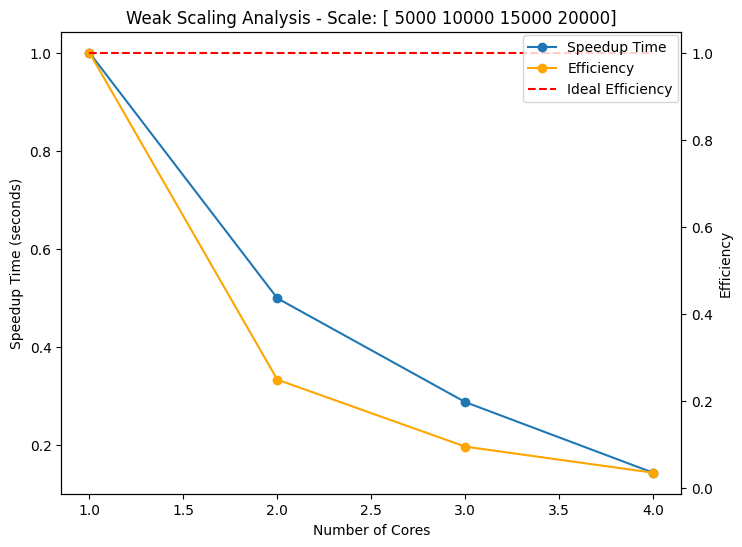

In [11]:
# Weak Scaling Analysis
execution_times = np.array([1.78, 3.57, 6.21, 12.5])
core_counts = np.array([1, 2, 3, 4])
array_sizes = np.array([5000, 10000, 15000, 20000])
speedup_time = [execution_times[0]/t for t in execution_times]
efficiency_ammounts = speedup_time/core_counts

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title(f'Weak Scaling Analysis - Scale: {array_sizes}')
ax.set_xlabel('Number of Cores')
ax.set_ylabel('Speedup Time (seconds)')
ax.plot(core_counts, speedup_time, marker='o', label='Speedup Time')

ax2 = ax.twinx()
ax2.set_ylabel('Efficiency')
ax2.plot(core_counts, efficiency_ammounts, marker='o', color='orange', label='Efficiency')
ax2.hlines(1, xmin=core_counts[0], xmax=core_counts[-1], colors='red', linestyles='dashed', label='Ideal Efficiency')
fig.legend(loc='upper right', bbox_to_anchor=(0.905, 0.886))


plt.show()


Disscussion of Results:
The results show that this implementation does NOT recive good scaling. Infact this scalling is quite bad when compared with the ideal weak scaling efficency and the strong scaling speedup time. I belive this is caused by reading and writng the chunks into memory. From what I currently understand I am uncertain if this means I should have larger chunks or smaller chunks.